# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects

<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [331]:
import pandas as pd

df = pd.read_csv('peer_effects_room.csv') # loading dataset

df.sort_values(by = ['room'], inplace = True) # Sort by room

df2 = df.iloc[::2]
df3 = df.iloc[1::2] # Split, so we have two separate datasets. 

df2.reset_index(drop = True, inplace = True)
df3.reset_index(inplace = True)

df3 = df3[['person', 'high_school_GPA', 'college_GPA']].add_suffix('_other')

df_new = pd.merge(df2, df3, left_index = True, right_index = True)

<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [332]:
df_new.head()

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
0,1757,0,-0.181905,0.566177,1603,-0.622770,0.540078
1,1649,1,0.378918,0.033256,466,-2.248266,-3.596904
2,1929,2,-0.095399,-0.052611,816,-0.798128,-1.811919
3,1719,3,1.885767,-1.104111,481,-1.094094,-2.096950
4,1108,4,0.977881,0.880004,1887,-2.513904,0.225987


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

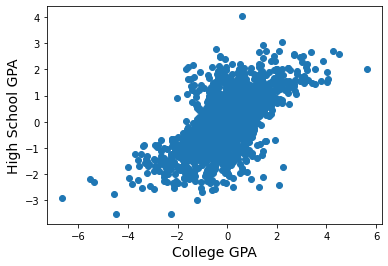

In [340]:
%matplotlib inline
import matplotlib.pylab as plt

plt.scatter(df['college_GPA'], df['high_school_GPA'])
plt.xlabel('College GPA', size = 14)
plt.ylabel('High School GPA', size = 14)
plt.show()

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

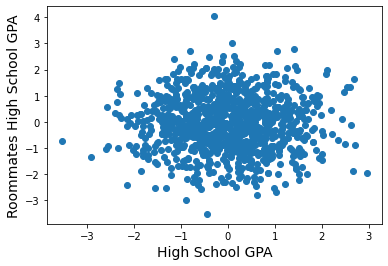

In [341]:
plt.scatter(df_new['high_school_GPA'], df_new['high_school_GPA_other'])
plt.xlabel('High School GPA', size = 14)
plt.ylabel('Roommates High School GPA', size = 14)
plt.show()

In [349]:
import statsmodels.formula.api as smf

reg = smf.ols('high_school_GPA ~ high_school_GPA_other', data = df_new).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03567
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.850
Time:                        22:03:14   Log-Likelihood:                -1405.8
No. Observations:                1000   AIC:                             2816.
Df Residuals:                     998   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0202      0.031     -0.645      0.519      -0.082       0.041
high_school_GPA_other    -0.0056      0.030     -0.189      0.850      -0.064       0.052
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.361
Skew:                           0.022   Prob(JB):                        0.835
Kurtosis:                       2.918   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>> We note that there indeed does not appear to be any systematic relationship between roommates' high school GPA, as indicative of random assignment.  

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

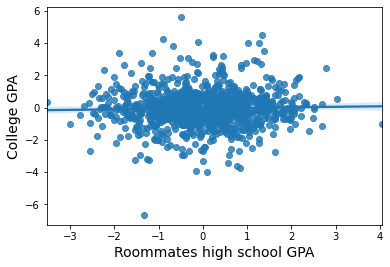

In [363]:
import seaborn as sns

sns.regplot('high_school_GPA_other', 'college_GPA', df_new)
plt.ylabel('College GPA', size = 14)
plt.xlabel('Roommates high school GPA', size = 14)
plt.show()

>> The above plot appears slightly less random than before, with some very slight positive trend in your own college GPA for better roommate high school GPA. 

In [356]:
reg = smf.ols('college_GPA ~ high_school_GPA + high_school_GPA_other', df_new).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     357.9
Date:                Mon, 18 May 2020   Prob (F-statistic):          6.95e-118
Time:                        22:25:55   Log-Likelihood:                -1281.6
No. Observations:                1000   AIC:                             2569.
Df Residuals:                     997   BIC:                             2584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0227      0.028     -0.823      0.411      -0.077       0.031
high_school_GPA           0.7476      0.028     26.728      0.000       0.693       0.803
high_school_GPA_other     0.0358      0.026      1.372      0.170      -0.015       0.087
==============================================================================
Omnibus:                       49.384   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.086
Skew:                           0.025   Prob(JB):                     2.34e-36
Kurtosis:                       4.984   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

*Note: Can't really figure out if this is implied by the question, but it would seem more meaningful to run the regression clustered on rooms. Otherwise it would be the same as before?*

In [358]:
reg = smf.ols('college_GPA ~ high_school_GPA + high_school_GPA_other',
              data = df_new).fit()
clustered = reg.get_robustcov_results(cov_type = 'cluster', groups = df_new.room)

clustered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 18 May 2020   Prob (F-statistic):           4.63e-63
Time:                        22:28:38   Log-Likelihood:                -1281.6
No. Observations:                1000   AIC:                             2569.
Df Residuals:                     997   BIC:                             2584.
Df Model:                           2                                         
Covariance Type:              cluster                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0227      0.028     -0.822      0.412      -0.077       0.032
high_school_GPA           0.7476      0.041     18.236      0.000       0.667       0.828
high_school_GPA_other     0.0358      0.025      1.446      0.149      -0.013       0.084
==============================================================================
Omnibus:                       49.384   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.086
Skew:                           0.025   Prob(JB):                     2.34e-36
Kurtosis:                       4.984   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

>> Naturally, the standard error on `high_school_GPA` is larger, while it is a bit smaller for the roommates high school GPA. This might be some indication of peer effects, but it hardly seems significant. Perhaps the question is meant to reflect effect of college GPA of the roommate on your own academic performance? The plot below seems to indicate that this has more significant results.   

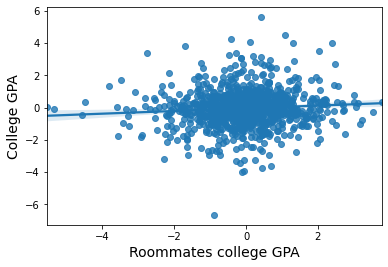

In [364]:
sns.regplot('college_GPA_other', 'college_GPA', df_new) 
plt.ylabel('College GPA', size = 14)
plt.xlabel('Roommates college GPA', size = 14)
plt.show()

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

>> In order to avoid selection-bias, they look at entire school years instead of particular classes. Specifically, the Kraka report makes use of the fact that the average composition of a school may be known, but yearly fluctuations are almost impossible to anticipate. In [Hoxby (2000)](https://www.nber.org/papers/w7867), the seminal breakthrough is this exact idea. Namely, to exploit the fact that there is at least some variation in adjacent cohorts of students. This is to say that a school in a specific district may have some endogenous composition in relation to the district, but it will still be susceptible to exogenous variation in the population. 

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

>> In [Hoxby (2000)](https://www.nber.org/papers/w7867) it is addressed that the exogenous variation in school composition may be a general time trend. Consider a reform of school districts; if this was to gradually include more schools with a specific composition, the variation would not be idiosyncratic, but specific to that particular school district. 

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

>> In the above case, one could consider a discontinuity design. The ideal identification strategy (trivially) would be random assignment, but this hardly seems feasible. Propensity scores, DD or matching may be a way to circumvent general trends. 